In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import os

# --- CONFIGURAÇÕES DE IDENTIDADE VISUAL (PALETA GRAN) ---
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"
FUNDO_EIXOS = "#F9F9F9"

# Tipografia para PDF
FONT_LABEL = 20
FONT_TICK = 18
FONT_SUBFIGURE = 24

sns.set_theme(style="whitegrid", rc={"axes.facecolor": FUNDO_EIXOS})


# Força o uso da fonte DejaVu Sans, que tem todos os glifos matemáticos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

np.random.seed(28) # Fixando semente para o gerador de dados do Boxplot

### Comparativo de Métodos de Detecção de Outliers: Paramétrico vs Não-Paramétrico

Este notebook gera a **Figura [FIG_Z_VS_IQR]** da Aula 4.
A visualização possui dois quadros:
* **(a) Método Z-Score (Paramétrico):** Exibe a curva de distribuição Normal padrão. A detecção de outliers se dá nas caudas extremas, onde os dados ultrapassam $\pm 3\sigma$ (desvios padrões) da média $\mu$.
* **(b) Método IQR (Não-Paramétrico):** Exibe a anatomia de um Boxplot, onde os dados não assumem normalidade e a análise de outliers se dá através da distância dos quartis ($Q_1$ e $Q_3$), utilizando a regra de $\pm 1,5 \times IQR$.

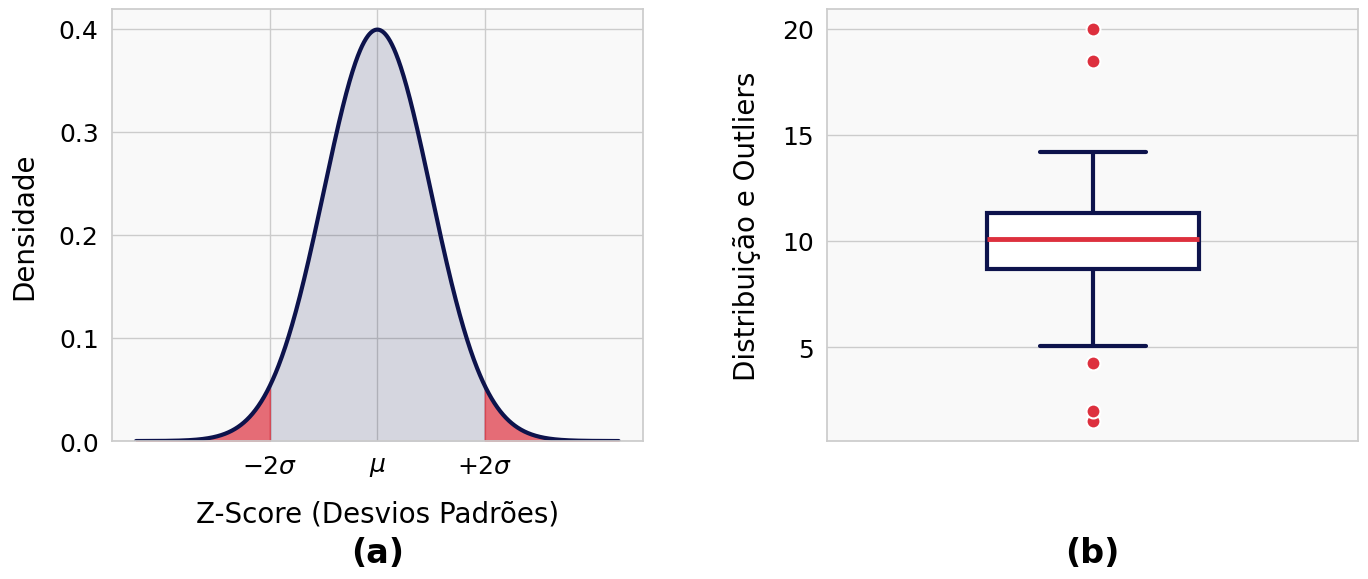

In [16]:
# Configuração da figura (Reduzimos o figsize para a imagem ser menos espremida no PDF)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), facecolor=COR_BRANCO)

# ==========================================================
# (a) SUBPLOT ESQUERDO: Curva Normal (Z-Score)
# ==========================================================
x_normal = np.linspace(-4.5, 4.5, 1000)
y_normal = stats.norm.pdf(x_normal, 0, 1)

ax1.plot(x_normal, y_normal, color=COR_AZUL_PRINCIPAL, lw=3)

# Região central e caudas (+/- 2 Sigma)
ax1.fill_between(x_normal, y_normal, where=(x_normal >= -2) & (x_normal <= 2), 
                 color=COR_AZUL_PRINCIPAL, alpha=0.15)
ax1.fill_between(x_normal, y_normal, where=(x_normal <= -2), 
                 color=COR_VERMELHO, alpha=0.7)
ax1.fill_between(x_normal, y_normal, where=(x_normal >= 2), 
                 color=COR_VERMELHO, alpha=0.7)

# Formatação dos eixos (a)
ax1.set_xticks([-2, 0, 2])
ax1.set_xticklabels([r'$-2\sigma$', r'$\mu$', r'$+2\sigma$'], fontsize=FONT_TICK, color=COR_PRETO)

# Garantindo que a curva encoste no eixo X
ax1.set_ylim(bottom=0) 

ax1.set_xlabel('Z-Score (Desvios Padrões)', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)
ax1.set_ylabel('Densidade', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)
ax1.yaxis.get_offset_text().set_visible(False)

# ==========================================================
# (b) SUBPLOT DIREITO: Boxplot (Método IQR)
# ==========================================================
dados_boxplot = np.concatenate([np.random.normal(10, 2, 100), [1.5, 2, 18.5, 20]])

sns.boxplot(y=dados_boxplot, ax=ax2, color=COR_BRANCO, width=0.4,
            boxprops=dict(edgecolor=COR_AZUL_PRINCIPAL, lw=3),
            whiskerprops=dict(color=COR_AZUL_PRINCIPAL, lw=3),
            capprops=dict(color=COR_AZUL_PRINCIPAL, lw=3),
            medianprops=dict(color=COR_VERMELHO, lw=3.5),
            flierprops=dict(marker='o', markerfacecolor=COR_VERMELHO, markeredgecolor=COR_BRANCO, markersize=10, markeredgewidth=1.5))

# Formatação dos eixos (b)
ax2.set_xticks([])
ax2.set_ylabel('Distribuição e Outliers', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)

# ==========================================================
# FINALIZAÇÃO: Layout, Subfiguras e Salvamento
# ==========================================================
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO)

# Posição das letras indicativas ancoradas nos eixos
ax1.text(0.5, -0.28, '(a)', transform=ax1.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')
ax2.text(0.5, -0.28, '(b)', transform=ax2.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')

# Ajustes de espaçamento para as fontes maiores não se sobreporem
plt.tight_layout(w_pad=4.0)
fig.subplots_adjust(bottom=0.25)

# Salvamento padronizado
caminho_save = os.path.join('..', 'outputs', 'figures', 'aula_04')
os.makedirs(caminho_save, exist_ok=True)
plt.savefig(os.path.join(caminho_save, '02_z_vs_iqr.png'), dpi=300)

plt.show()